# Customer Churn Analysis

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading data set
df=pd.read_csv('Telecom_customer_churn[1].csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

It contains 7043 rows and 21 columns.
Churn is the target column.

In [5]:
#Checking for the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Checking data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We have int, float and object type data

In [7]:
# Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We found that there are total 11 missing values in the 'TotalCharges' column of the dataset.

In [8]:
# Changing the datatype of the column 'TotalCharges' from Object to float and replacing the blank values with NaN

df["TotalCharges"]=df["TotalCharges"].apply(lambda x: float(x) if len(x)>1 else np.nan)

In [9]:
# Checking for the missing values again:

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Let's locate the rows of the 'TotalCharges' column which contain missing values:
df.loc[df['TotalCharges'].isna(),['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [11]:
# Since the value of 'tenure' is 0 so we'll replace the missing values of the 'TotalCharges' column with 0.
df['TotalCharges'].fillna(0, inplace=True)

In [12]:
# Checking for the missing values again:

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Checking for the information of the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Checking for the value counts of the target column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Target Column Distribution')

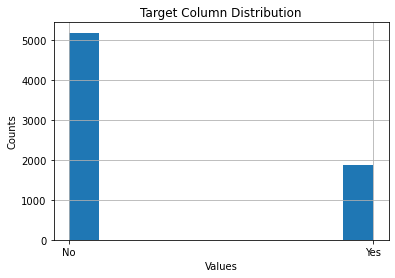

In [15]:
# Plotting histogram to show the distribution of target columnn
plt.figure(figsize=[6,4])
df['Churn'].hist(grid=True)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Target Column Distribution')

The data looks imbalance and calls for balancing.

In [16]:
# Checking for the value counts of the 'gender' column
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender Column Distribution')

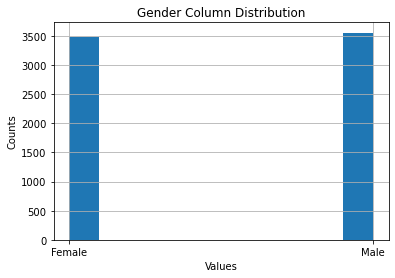

In [17]:
# Plotting histogram to show the distribution of gender columnn
plt.figure(figsize=[6,4])
df['gender'].hist(grid=True)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Gender Column Distribution')

This has equal distribution

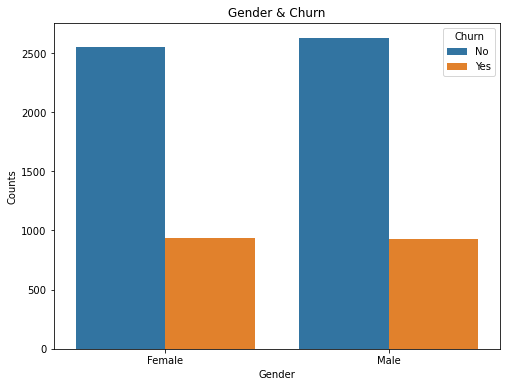

In [18]:
# Checking for the gender wise distribution of the target column
plt.figure(figsize=[8,6])
sns.countplot(x=df['gender'], hue=df['Churn'], data=df)
plt.title('Gender & Churn')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

Most of the male and female prefers to continue.

2. 'SeniorCitizen' Column:

In [19]:
# Checking for the value counts of the SeniorCitizen column
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Text(0.5, 1.0, 'SeniorCitizen Column Distribution')

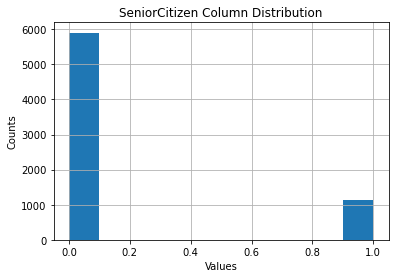

In [20]:
# Plotting histogram to show the distribution of SeniorCitizen columnn
plt.figure(figsize=[6,4])
df['SeniorCitizen'].hist(grid=True)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('SeniorCitizen Column Distribution')

The Senior citizen count is low and most of them are younsters.

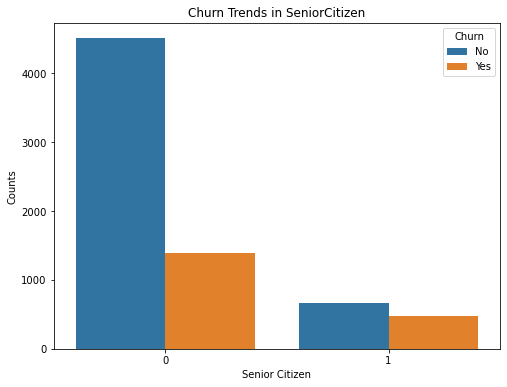

In [21]:
# Checking for the churn trends in the seniorcitizen
plt.figure(figsize=[8,6])
sns.countplot(x=df['SeniorCitizen'], hue=df['Churn'], data=df)
plt.xlabel('Senior Citizen')
plt.ylabel('Counts')
plt.title('Churn Trends in SeniorCitizen')
plt.show()

Plot shows the churn is high in senior citizens.

3. 'PhoneService' Column:

In [22]:
# Checking for the value counts of the PhoneService column
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

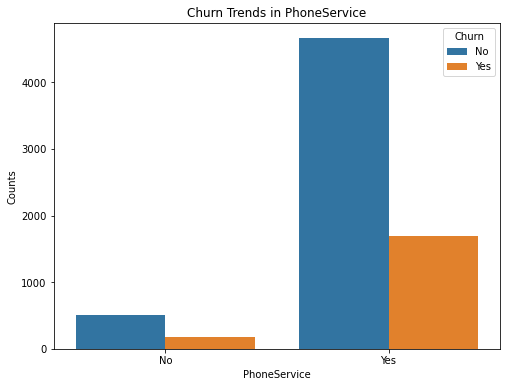

In [23]:
# Checking for the churn trends in the PhoneService
plt.figure(figsize=[8,6])
sns.countplot(x=df['PhoneService'], hue=df['Churn'], data=df)
plt.xlabel('PhoneService')
plt.ylabel('Counts')
plt.title('Churn Trends in PhoneService')
plt.show()

More customers have opted for phone service.

In [24]:
# Checking for the value counts of the MultipleLines column
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

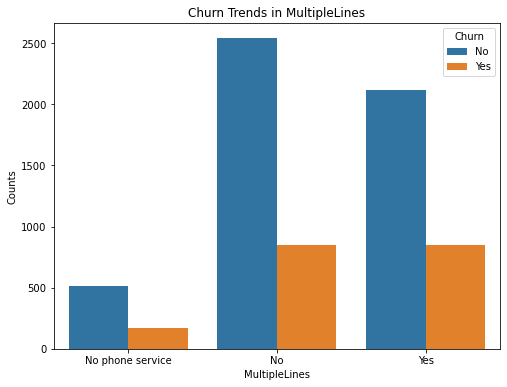

In [25]:
# Checking for the churn trends in the MultipleLines
plt.figure(figsize=[8,6])
sns.countplot(x=df['MultipleLines'], hue=df['Churn'], data=df)
plt.xlabel('MultipleLines')
plt.ylabel('Counts')
plt.title('Churn Trends in MultipleLines')
plt.show()

Majority of them use single line service.

5. 'InternetService' column:

In [26]:
# Checking for the value counts of the InternetService column
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

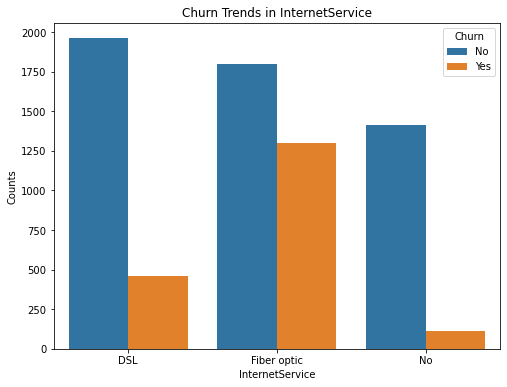

In [27]:
# Checking for the churn trends in the MultipleLines
plt.figure(figsize=[8,6])
sns.countplot(x=df['InternetService'], hue=df['Churn'], data=df)
plt.xlabel('InternetService')
plt.ylabel('Counts')
plt.title('Churn Trends in InternetService')
plt.show()

Majority of them use fiber optic network

6. 'OnlineSecurity' column:

In [28]:
# Checking for the value counts of the OnlineSecurity column
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

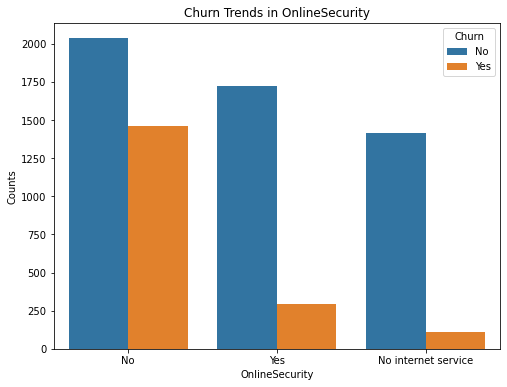

In [29]:
# Checking for the churn trends in the OnlineSecurity
plt.figure(figsize=[8,6])
sns.countplot(x=df['OnlineSecurity'], hue=df['Churn'], data=df)
plt.xlabel('OnlineSecurity')
plt.ylabel('Counts')
plt.title('Churn Trends in OnlineSecurity')
plt.show()

Majority of them have no online security.

7. 'OnlineBackup' column:

In [30]:
# Checking for the value counts of the OnlineBackup column
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

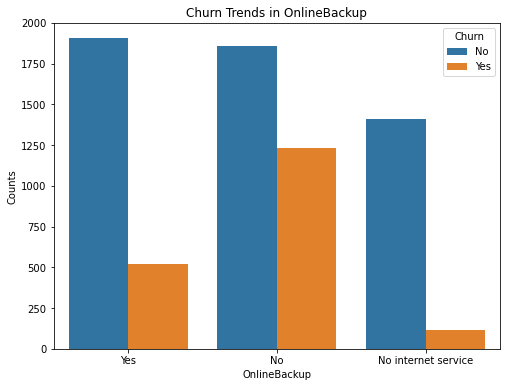

In [31]:
# Checking for the churn trends in the OnlineBackup
plt.figure(figsize=[8,6])
sns.countplot(x=df['OnlineBackup'], hue=df['Churn'], data=df)
plt.xlabel('OnlineBackup')
plt.ylabel('Counts')
plt.title('Churn Trends in OnlineBackup')
plt.show()

Many customers don have online backup

8. 'DeviceProtection' column:

In [32]:
# Checking for the value counts of the DeviceProtection column
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

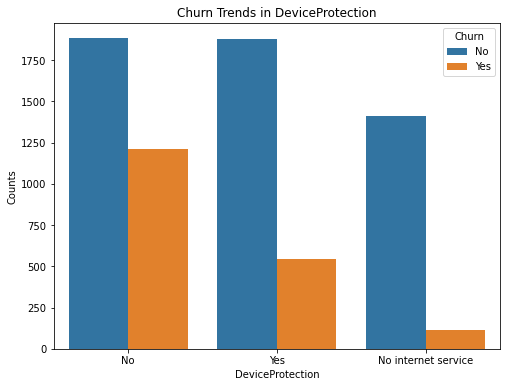

In [33]:
# Checking for the churn trends in the DeviceProtection
plt.figure(figsize=[8,6])
sns.countplot(x=df['DeviceProtection'], hue=df['Churn'], data=df)
plt.xlabel('DeviceProtection')
plt.ylabel('Counts')
plt.title('Churn Trends in DeviceProtection')
plt.show()

Many don have Device Protection

9. 'TechSupport' Column:

In [34]:
# Checking for the value counts of the TechSupport column
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

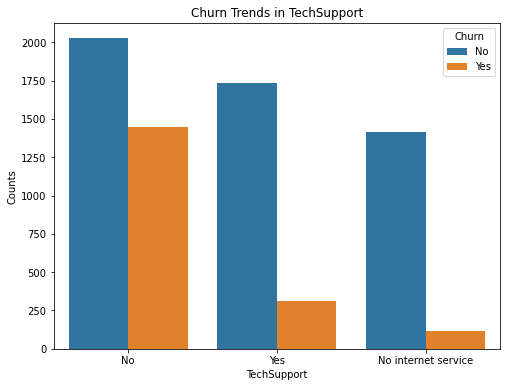

In [35]:
# Checking for the churn trends in the TechSupport
plt.figure(figsize=[8,6])
sns.countplot(x=df['TechSupport'], hue=df['Churn'], data=df)
plt.xlabel('TechSupport')
plt.ylabel('Counts')
plt.title('Churn Trends in TechSupport')
plt.show()

Many are not using tech support

10. 'StreamingTV' column:


In [36]:
# Checking for the value counts of the StreamingTV column
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

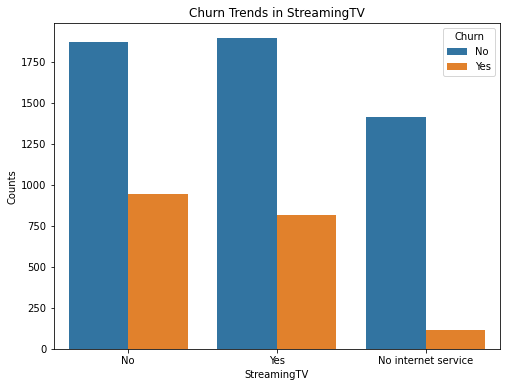

In [37]:
# Checking for the churn trends in the StreamingTV
plt.figure(figsize=[8,6])
sns.countplot(x=df['StreamingTV'], hue=df['Churn'], data=df)
plt.xlabel('StreamingTV')
plt.ylabel('Counts')
plt.title('Churn Trends in StreamingTV')
plt.show()

Again many are not streaming TV using internet.

11. 'StreamingMovies' column:

In [38]:
# Checking for the value counts of the StreamingMovies column
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

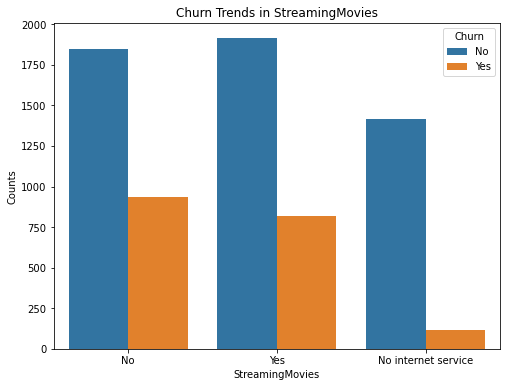

In [39]:
# Checking for the churn trends in the StreamingMovies
plt.figure(figsize=[8,6])
sns.countplot(x=df['StreamingMovies'], hue=df['Churn'], data=df)
plt.xlabel('StreamingMovies')
plt.ylabel('Counts')
plt.title('Churn Trends in StreamingMovies')
plt.show()

More number of people are not streaming movies

12. 'Contract' column:

In [40]:
# Checking for the value counts of the Contract column
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

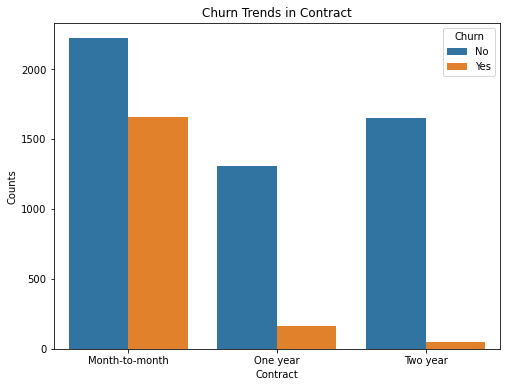

In [41]:
# Checking for the churn trends in the Contract
plt.figure(figsize=[8,6])
sns.countplot(x=df['Contract'], hue=df['Churn'], data=df)
plt.xlabel('Contract')
plt.ylabel('Counts')
plt.title('Churn Trends in Contract')
plt.show()

Majority of them use montly subscription plan.

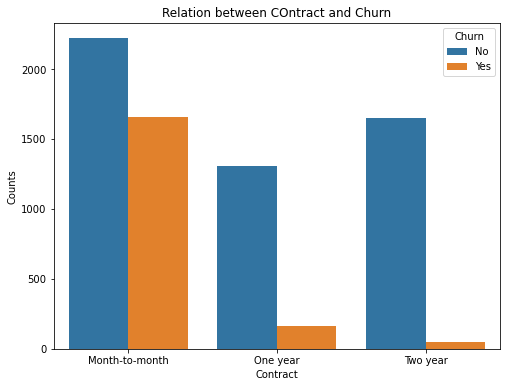

In [42]:
# Let's check the relationship between 'Customer churn' and 'Contract'
plt.figure(figsize=[8,6])
sns.countplot(x=df['Contract'], hue=df['Churn'], data=df)
plt.title('Relation between COntract and Churn')
plt.ylabel('Counts')
plt.xlabel('Contract')
plt.show()

 customers having monthly contract have high rate of churn as compared to the customers having one or two years of contract.

13. 'PaperlessBilling' column:

In [43]:
# Checking for the value counts of the PaperlessBilling column
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

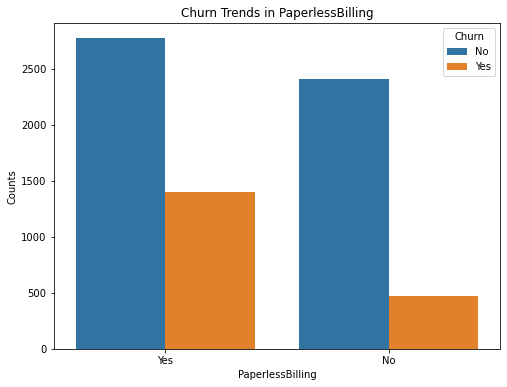

In [44]:
# Checking for the churn trends in the PaperlessBilling
plt.figure(figsize=[8,6])
sns.countplot(x=df['PaperlessBilling'], hue=df['Churn'], data=df)
plt.xlabel('PaperlessBilling')
plt.ylabel('Counts')
plt.title('Churn Trends in PaperlessBilling')
plt.show()

Major option opted is for paperless bill.

14. 'PaymentMethod' column:

In [45]:
# Checking for the value counts of the PaymentMethod column
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
# Label encoding the 'customerID' column
le.fit(df['customerID'].drop_duplicates())
le.classes_
df['customerID'] = le.transform(df['customerID'])

In [48]:
# Label encoding the 'Gender' column
le.fit(df['gender'].drop_duplicates())
le.classes_
df['gender'] = le.transform(df['gender'])

In [49]:
# Label encoding the 'Partner' column
le.fit(df['Partner'].drop_duplicates())
le.classes_
df['Partner'] = le.transform(df['Partner'])

In [50]:
# Label encoding the 'Dependents' column
le.fit(df['Dependents'].drop_duplicates())
le.classes_
df['Dependents'] = le.transform(df['Dependents'])

In [51]:
# Label encoding the 'PhoneService' column
le.fit(df['PhoneService'].drop_duplicates())
le.classes_
df['PhoneService'] = le.transform(df['PhoneService'])

In [52]:
# Label encoding the 'MultipleLines' column
le.fit(df['MultipleLines'].drop_duplicates())
le.classes_
df['MultipleLines'] = le.transform(df['MultipleLines'])

In [53]:
# Label encoding the 'InternetService' column
le.fit(df['InternetService'].drop_duplicates())
le.classes_
df['InternetService'] = le.transform(df['InternetService'])

In [54]:
# label encoding the 'OnlineSecurity' column
le.fit(df['OnlineSecurity'].drop_duplicates())
le.classes_
df['OnlineSecurity'] = le.transform(df['OnlineSecurity'])

In [55]:
# Label encoding the 'OnlineBackup' column
le.fit(df['OnlineBackup'].drop_duplicates())
le.classes_
df['OnlineBackup'] = le.transform(df['OnlineBackup'])

In [56]:
# Label encoding the 'DeviceProtection' column
le.fit(df['DeviceProtection'].drop_duplicates())
le.classes_
df['DeviceProtection'] = le.transform(df['DeviceProtection'])

In [57]:
# Label encoding the 'TechSupport' column
le.fit(df['TechSupport'].drop_duplicates())
le.classes_
df['TechSupport'] = le.transform(df['TechSupport'])

In [58]:
# Label encoding the 'StreamingTV' column
le.fit(df['StreamingTV'].drop_duplicates())
le.classes_
df['StreamingTV'] = le.transform(df['StreamingTV'])

In [59]:
# Label encoding the 'StreamingMovies' column
le.fit(df['StreamingMovies'].drop_duplicates())
le.classes_
df['StreamingMovies'] = le.transform(df['StreamingMovies'])

In [60]:
# Label encoding the 'Contract' column
le.fit(df['Contract'].drop_duplicates())
le.classes_
df['Contract'] = le.transform(df['Contract'])

In [61]:
# Label encoding the 'PaperlessBilling' column
le.fit(df['PaperlessBilling'].drop_duplicates())
le.classes_
df['PaperlessBilling'] = le.transform(df['PaperlessBilling'])

In [62]:
# Label encoding the 'PaymentMethod' column
le.fit(df['PaymentMethod'].drop_duplicates())
le.classes_
df['PaymentMethod'] = le.transform(df['PaymentMethod'])

In [63]:
# Label encoding the 'Churn' column 
le.fit(df['Churn'].drop_duplicates())
le.classes_
df['Churn'] = le.transform(df['Churn'])

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [65]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [66]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.000376,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309


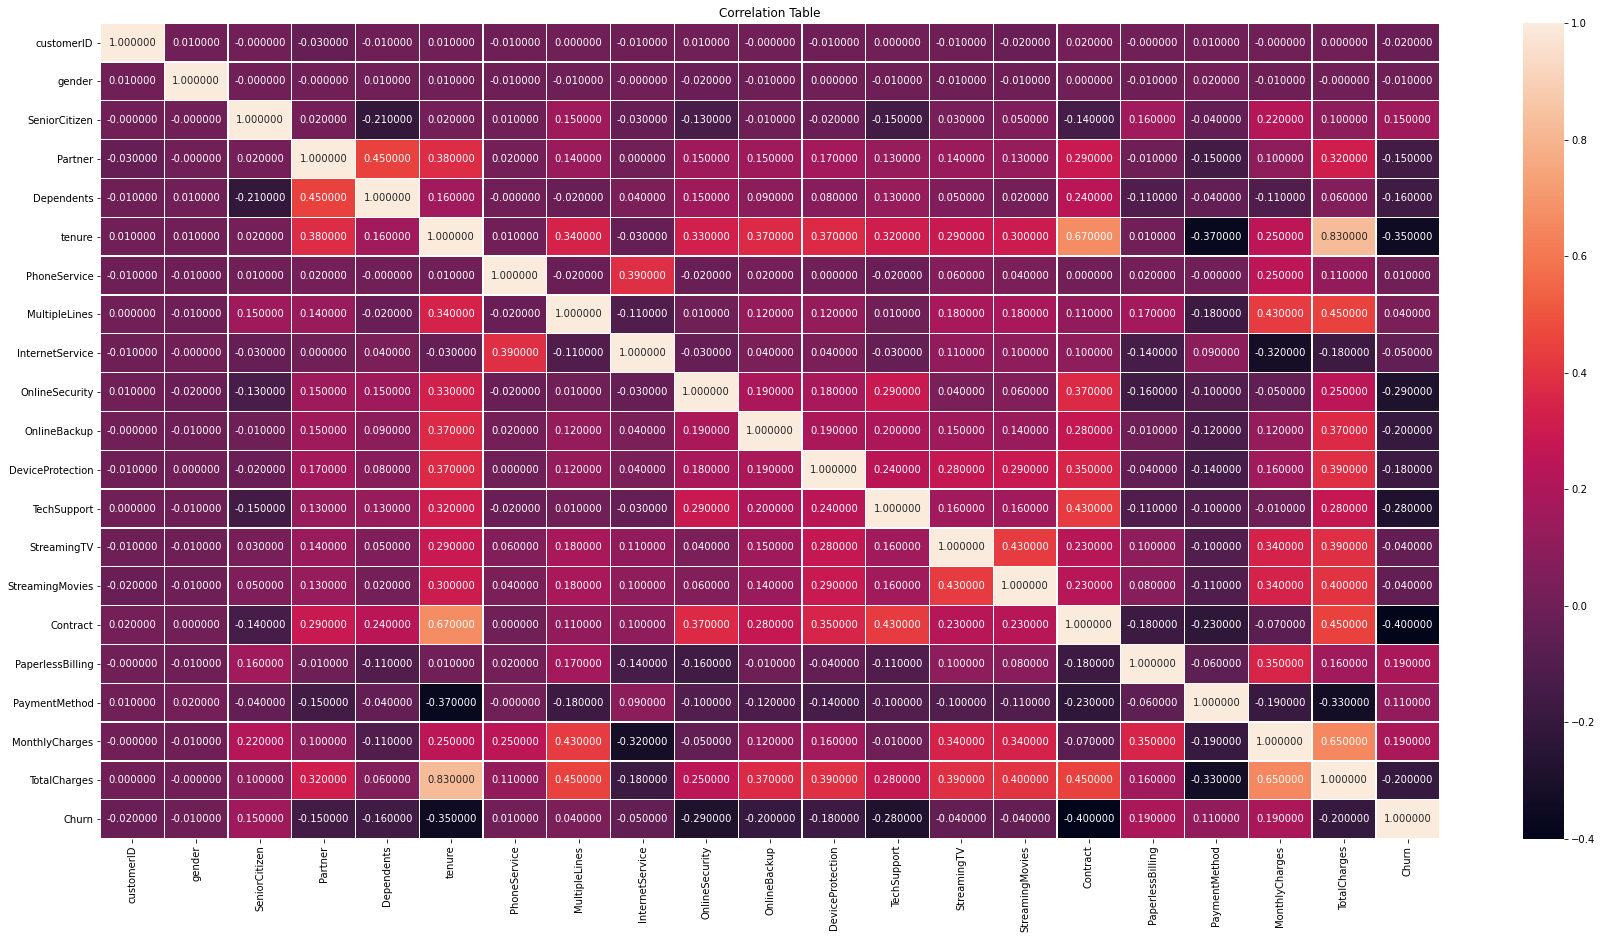

In [67]:
# Plotting heatmap for the correlation table
plt.figure(figsize=[30,15])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

PaperlessBilling and MonthlyCharges have 19% correlation,SeniorCitizen have 15% correlation, PaymentMethod have 11% correlation, Multiplelines have 4% correlation, Phoneservice have 1% correlation.

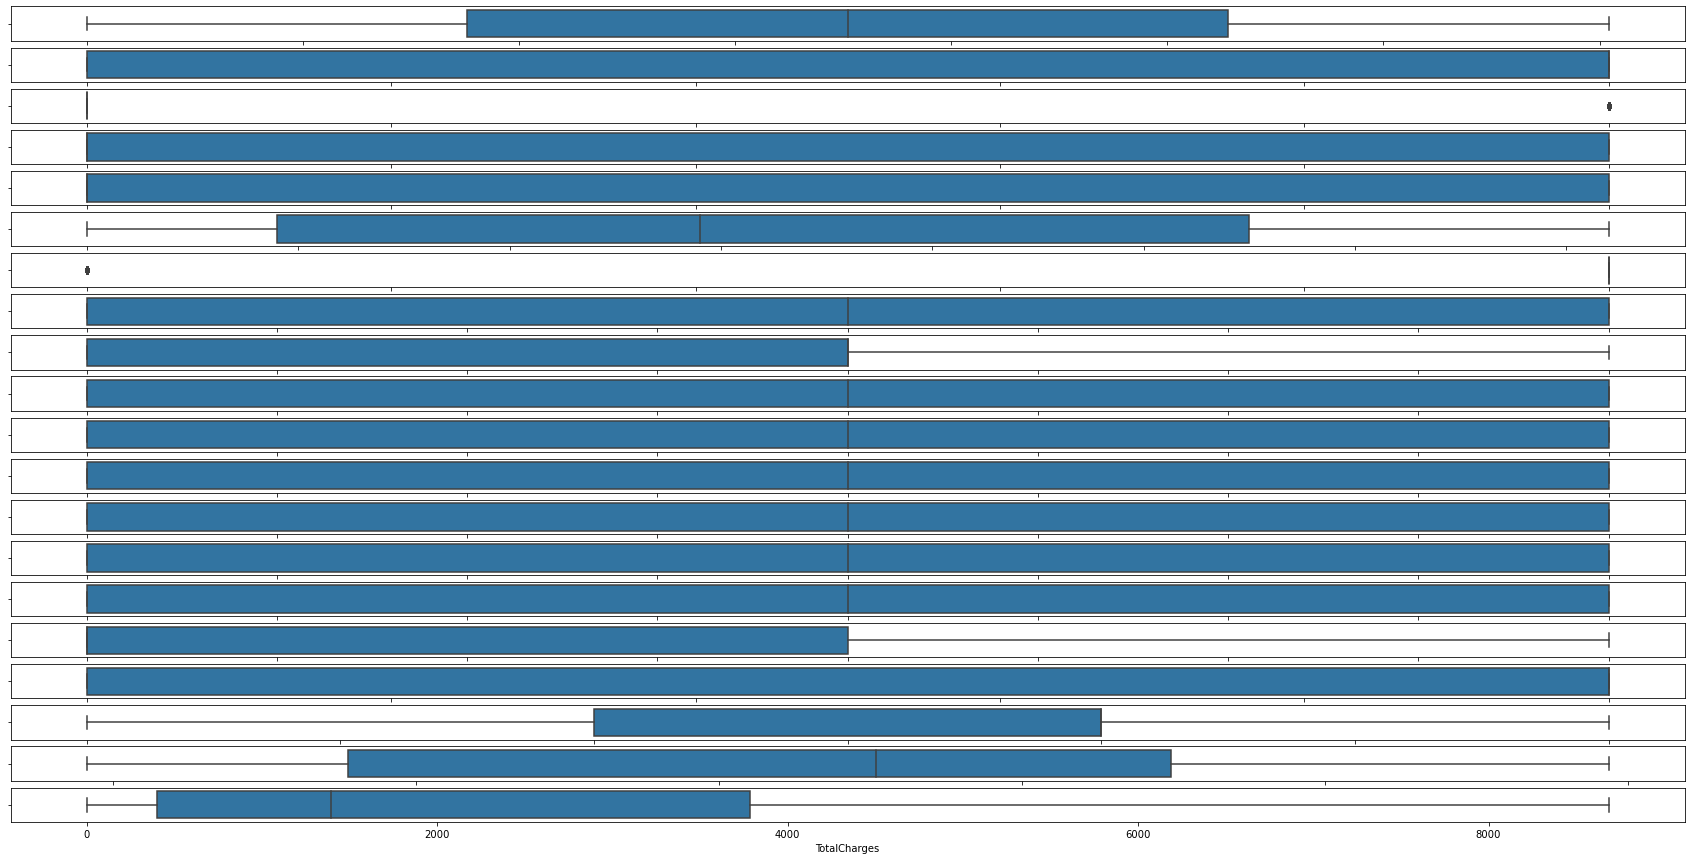

In [68]:
# Checking for outliers
# Plotting boxplot to check the outliers
fig, axs = plt.subplots(20, figsize=[30,15])

plt1 = sns.boxplot(df['customerID'], ax=axs[0])
plt2 = sns.boxplot(df['gender'], ax = axs[1])
plt3 = sns.boxplot(df['SeniorCitizen'], ax = axs[2])
plt4 = sns.boxplot(df['Partner'], ax=axs[3])
plt5 = sns.boxplot(df['Dependents'], ax = axs[4])
plt6 = sns.boxplot(df['tenure'], ax= axs[5])
plt7 = sns.boxplot(df['PhoneService'], ax = axs[6])
plt8 = sns.boxplot(df['MultipleLines'], ax= axs[7])
plt9 = sns.boxplot(df['InternetService'], ax = axs[8])
plt10 = sns.boxplot(df['OnlineSecurity'], ax = axs[9])
plt11 = sns.boxplot(df['OnlineBackup'], ax = axs[10])
plt12 = sns.boxplot(df['DeviceProtection'], ax = axs[11])
plt13 = sns.boxplot(df['TechSupport'], ax =axs[12])
plt14 = sns.boxplot(df['StreamingTV'], ax =axs[13])
plt15 = sns.boxplot(df['StreamingMovies'], ax = axs[14])
plt16 = sns.boxplot(df['Contract'], ax = axs[15])
plt17 = sns.boxplot(df['PaperlessBilling'], ax = axs[16])
plt18 = sns.boxplot(df['PaymentMethod'], ax = axs[17])
plt19 = sns.boxplot(df['MonthlyCharges'], ax = axs[18])
plt20 = sns.boxplot(df['TotalCharges'], ax =axs[19])

No outliers are present

In [69]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
Churn               1.063031
dtype: float64

1. SeniorCitizen 2. Dependents 3. PhoneService 4. Contract 5. TotalCharges 6. Churn have skewness.

In [70]:
# Removing skewness
# Splitting the dataset into feature and vector:
x = df.drop(['Churn'], axis =1)
y = df['Churn']

In [71]:
# Removing skewness
from sklearn.preprocessing import power_transform
x = power_transform(x)
x

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.1585412 , -1.79299643],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.23949171,  0.25480918],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.34266505, -1.37517297],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.16724064, -0.85276427],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.33431207, -0.91533153],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.33886338,  1.48509473]])

In [72]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.1585412 , -1.79299643],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.23949171,  0.25480918],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.34266505, -1.37517297],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.16724064, -0.85276427],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.33431207, -0.91533153],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.33886338,  1.48509473]])

Balancing data by oversampling 

In [73]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [74]:
#Checking the value count of the target column after oversampling
y_over.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Data looks Balanced.

# Model Training

In [76]:
# Finding best random state
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,600):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.8028985507246377  on Random_State  409


In [78]:
# Data PreProcessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=59)

1. Logistic Regression


In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))


0.8218594748048261
[[968  83]
 [168 190]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1051
           1       0.70      0.53      0.60       358

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



82% Accuracy

2. RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
predRF = RF.predict(x_test)

print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))
 

0.815471965933286
[[964  87]
 [173 185]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1051
           1       0.68      0.52      0.59       358

    accuracy                           0.82      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.81      0.82      0.81      1409



81 % accuracy.

3. DecisionTreeClassifier:

In [83]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
predDT = DT.predict(x_test)

print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))

0.7253371185237757
[[838 213]
 [174 184]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1051
           1       0.46      0.51      0.49       358

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.73      0.73      1409



72% Accuracy

Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("Cross Validation Score for LogisticRegression is ", scr.mean())


Cross Validation Score for LogisticRegression is  0.8067590046132009


In [85]:
scr = cross_val_score(RF, x, y, cv=5)
print("Cross Validation Score for RandomForestClassifier is ", scr.mean())


Cross Validation Score for RandomForestClassifier is  0.7934138896057811


In [86]:
scr = cross_val_score(DT, x, y, cv=5)
print("Cross Validation Score for DecisionTreeClassifier is ", scr.mean())

Cross Validation Score for DecisionTreeClassifier is  0.7295188399251565


Decision Tree Classifier has minimun difference between accuracy and cross validation. So decision tree is the best fit model.

Saving the model:

In [90]:
import pickle
filename = 'customer_churn_analysis.pkl'
pickle.dump(DT, open(filename, 'wb'))